In [1]:
import torch
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import csv

In [2]:
# Dataset config
LEN_ENCODE_SERIE = 100
LEN_DECODE_SERIE = 3
section_len = 100

DATA_TYPE = "sin"

In [45]:
# Makeup data tensor
num_data = 40000

data_tensor = torch.empty(num_data)


if DATA_TYPE == "polynomial":
    data_tensor[0] = 1
    for i in range(1, num_data):
        data_tensor[i] = data_tensor[i-1] * 1.0001
elif DATA_TYPE == "linear":
    for i in range(num_data):
        data_tensor[i] = 3 + i
elif DATA_TYPE == "sin":
    for i in range(num_data):
#         rand1 = random.randint(-1,1)
#         rand2 = random.randint(-1,1)
        x = (i + 5999) * 5
        rand1 = 1
        rand2 = random.randint(3,5)
        rand3 = math.log(random.randint(1, 10))
        data_tensor[i] = math.sin(rand2 + x) + x / 10 + rand3 / 3
else:
    raise(NotImplementedError)

print(data_tensor)
print(data_tensor.shape)


tensor([ 3000.9736,  3001.0767,  3002.2654,  ..., 22998.9043, 22999.5488,
        22998.8086])
torch.Size([40000])


Max 22999.548828125
Min 3000.761474609375
Mean 12999.75390625
Standard deviation 5773.57568359375


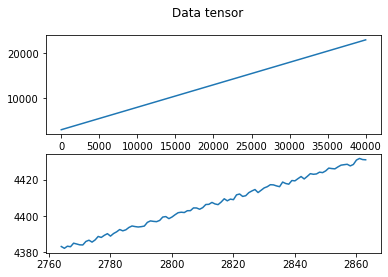

In [46]:
plt_time = list(range(len(data_tensor)))

section_start = random.randint(0, num_data - section_len)

fig, axs = plt.subplots(2)
fig.suptitle('Data tensor')
axs[0].plot(plt_time, data_tensor)
axs[1].plot(plt_time[section_start:section_start+section_len], data_tensor[section_start:section_start+section_len])

mini = torch.min(data_tensor)
maxi = torch.max(data_tensor)
mean = torch.mean(data_tensor)
std = torch.std(data_tensor)

print("Max", maxi.item())
print("Min", mini.item())
print("Mean", mean.item())
print("Standard deviation", std.item())

In [47]:
change = data_tensor[:-1]

Max 2.543912649154663
Min 0.5455954670906067
Mean 1.0572712421417236
Standard deviation 0.13375146687030792


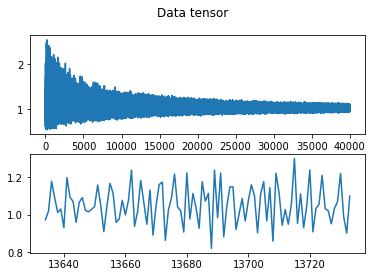

In [48]:
# Convert price to change in price
change = (data_tensor[1:] - data_tensor[:-1]) / data_tensor[:-1]
change *= 10000

change = 1.1 ** change

section_start = random.randint(0, num_data - section_len)
fig, axs = plt.subplots(2)
fig.suptitle('Data tensor')
axs[0].plot(plt_time[:-1], change)
axs[1].plot(plt_time[section_start:section_start+section_len], change[section_start:section_start+section_len])

mini = torch.min(change)
maxi = torch.max(change)
mean = torch.mean(change)
std = torch.std(change)

print("Max", maxi.item())
print("Min", mini.item())
print("Mean", mean.item())
print("Standard deviation", std.item())

In [49]:
# Checking for nan data
assert(torch.sum(change != change) == 0)

Max 11.114953994750977
Min -3.825571298599243
Mean 5.218636260906351e-07
Standard deviation 1.0


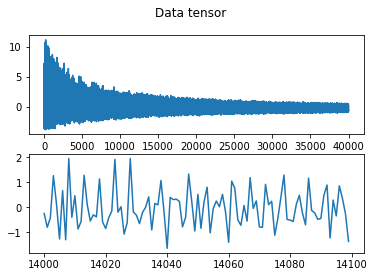

In [50]:
# Normalize
change = (change - mean) / std

section_start = random.randint(0, num_data - section_len)
fig, axs = plt.subplots(2)
fig.suptitle('Data tensor')
axs[0].plot(plt_time[:-1], change)
axs[1].plot(plt_time[section_start:section_start+section_len], change[section_start:section_start+section_len])

mini = torch.min(change)
maxi = torch.max(change)
mean = torch.mean(change)
std = torch.std(change)

print("Max", maxi.item())
print("Min", mini.item())
print("Mean", mean.item())
print("Standard deviation", std.item())

In [51]:
# Make input time serie data and target time serie data tensor 
num_data = (len(data_tensor) - LEN_ENCODE_SERIE - LEN_DECODE_SERIE) // LEN_DECODE_SERIE

X_shape = (num_data, LEN_ENCODE_SERIE)
y_shape = (num_data, LEN_DECODE_SERIE)

X, y = torch.empty(X_shape), torch.empty(y_shape)

for i in range(num_data):
    start = i * LEN_DECODE_SERIE
    X[i] = change[start:start+LEN_ENCODE_SERIE]
    y[i] = change[start+LEN_ENCODE_SERIE:start+LEN_ENCODE_SERIE+LEN_DECODE_SERIE]

In [52]:
# Analog y that turns > 1 std to 1
y = torch.ones_like(y) * (y > 0).float() + torch.zeros_like(y) * (y <= 0).float()

In [53]:
print(X.shape)
print(y.shape)
print(X)
print(y)

torch.Size([7979, 100])
torch.Size([7979, 5])
tensor([[-0.1795,  3.0010, -3.2665,  ...,  4.0698,  0.3211, -0.8391],
        [ 3.5637, -0.8074, -1.6778,  ...,  5.3672,  1.0634,  0.6101],
        [ 1.3609, -2.2163, -0.0356,  ...,  2.0350,  5.0729, -2.8268],
        ...,
        [-0.6068, -0.0290,  0.0875,  ..., -0.5137, -0.4100,  0.1286],
        [-0.3243, -0.3391,  0.2479,  ..., -0.4909, -0.2901, -0.2351],
        [-0.5378, -0.1130, -0.1810,  ..., -0.0947, -0.4451,  0.1382]])
tensor([[1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.]])


In [54]:
torch.save(X, "./../X.pt")
torch.save(y, "./../y.pt")